In [471]:
import pyforest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [472]:
df = pd.read_csv('loans_data_prediction.csv')

In [473]:
df.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
99592,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
80059,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
15825,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
33182,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 81174 to 3116
Data columns (total 14 columns):
Amount.Requested                  2500 non-null int64
Amount.Funded.By.Investors        2500 non-null float64
Interest.Rate                     2500 non-null object
Loan.Length                       2500 non-null object
Loan.Purpose                      2500 non-null object
Debt.To.Income.Ratio              2500 non-null object
State                             2500 non-null object
Home.Ownership                    2500 non-null object
Monthly.Income                    2499 non-null float64
FICO.Range                        2500 non-null object
Open.CREDIT.Lines                 2498 non-null float64
Revolving.CREDIT.Balance          2498 non-null float64
Inquiries.in.the.Last.6.Months    2498 non-null float64
Employment.Length                 2423 non-null object
dtypes: float64(5), int64(1), object(8)
memory usage: 293.0+ KB


In [475]:
df.isnull().sum()

Amount.Requested                   0
Amount.Funded.By.Investors         0
Interest.Rate                      0
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               0
State                              0
Home.Ownership                     0
Monthly.Income                     1
FICO.Range                         0
Open.CREDIT.Lines                  2
Revolving.CREDIT.Balance           2
Inquiries.in.the.Last.6.Months     2
Employment.Length                 77
dtype: int64

In [476]:
df.shape

(2500, 14)

In [477]:
pecentage_left = (df.shape[0] - df['Employment.Length'].isnull().sum()) / df.shape[0] * 100
pecentage_left

96.92

In [478]:
df = df.dropna(subset=['Employment.Length'])
df = df.dropna(subset=['Monthly.Income'])
df = df.dropna(subset=['Open.CREDIT.Lines'])
df = df.dropna(subset=['Inquiries.in.the.Last.6.Months'])
df = df.dropna(subset=['Revolving.CREDIT.Balance'])

In [479]:
df.shape

(2421, 14)

In [480]:
df.isnull().sum()

Amount.Requested                  0
Amount.Funded.By.Investors        0
Interest.Rate                     0
Loan.Length                       0
Loan.Purpose                      0
Debt.To.Income.Ratio              0
State                             0
Home.Ownership                    0
Monthly.Income                    0
FICO.Range                        0
Open.CREDIT.Lines                 0
Revolving.CREDIT.Balance          0
Inquiries.in.the.Last.6.Months    0
Employment.Length                 0
dtype: int64

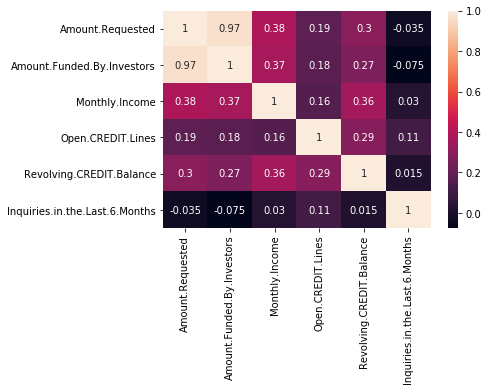

In [481]:
sns.heatmap(df.corr(), annot=True)

In [482]:
df.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
99592,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
80059,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
15825,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
33182,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [483]:
df['Interest.Rate'] = df['Interest.Rate'].str.strip('%')
df['Debt.To.Income.Ratio'] = df['Debt.To.Income.Ratio'].str.strip('%')
df['Loan.Length'] = df['Loan.Length'].str.strip(' months')

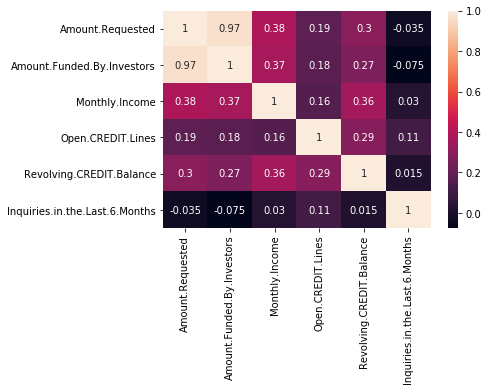

In [484]:
sns.heatmap(df.corr(), annot=True)

In [489]:
df1 = df['FICO.Range'].str.split('-',expand=True)
df2 = df1.join(df)
df2[0] = df2[0].astype(float)
df2[1] = df2[1].astype(float)

# df['FICO.Range'] = df['FICO.Range'].str.split('-')
# df['FICO.Range'] = df['FICO.Range'].str[0].astype(float)
# df.rename(columns={'FICO.Range': 'FICO.Score'}, inplace=True)

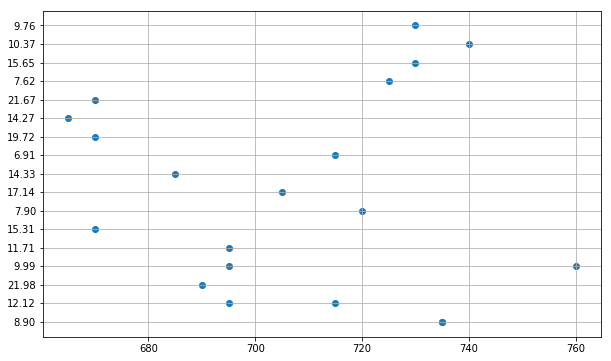

In [490]:
#-- HMM..
plt.figure(figsize=(10,6))
plt.scatter(df2[0].head(20), df2['Interest.Rate'].head(20))
plt.grid(True)

In [570]:
features = df2[['FICO.Range','Amount.Requested', 'Monthly.Income', 'Revolving.CREDIT.Balance','Amount.Funded.By.Investors',
                'Inquiries.in.the.Last.6.Months','Debt.To.Income.Ratio']]
label = df2[['Interest.Rate']]

In [571]:
df2['Amount.Requested'] = df2['Amount.Requested'].astype(float)
df2['Monthly.Income'] = df2['Monthly.Income'].astype(float)
df2['Loan.Length'] = df2['Loan.Length'].astype(float)
df2['Revolving.CREDIT.Balance'] = df2['Revolving.CREDIT.Balance'].astype(float)
df2['Inquiries.in.the.Last.6.Months'] = df2['Inquiries.in.the.Last.6.Months'].astype(float)
df2['Debt.To.Income.Ratio'] = df2['Debt.To.Income.Ratio'].astype(float)

df2['FICO.Range'] = df2['FICO.Range'].astype('category')
df2['FICO.Range'] = df2['FICO.Range'].cat.codes
features.head()

,FICO.Range,Amount.Requested,Monthly.Income,Revolving.CREDIT.Balance,Amount.Funded.By.Investors,Inquiries.in.the.Last.6.Months,Debt.To.Income.Ratio
81174,19,20000.0,6541.67,14272.0,20000.0,2.0,14.90
99592,15,19200.0,4583.33,11140.0,19200.0,1.0,28.36
80059,10,35000.0,11500.00,21977.0,35000.0,1.0,23.81
15825,11,10000.0,3833.33,9346.0,9975.0,0.0,14.30
33182,11,12000.0,3195.00,14469.0,12000.0,0.0,18.78


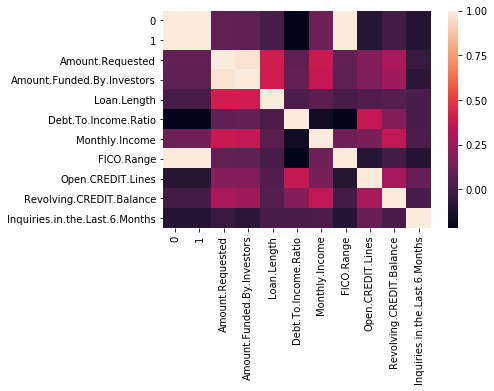

In [572]:
sns.heatmap(df2.corr())

In [573]:
df2.isnull().sum()

0                                 0
1                                 0
Amount.Requested                  0
Amount.Funded.By.Investors        0
Interest.Rate                     0
Loan.Length                       0
Loan.Purpose                      0
Debt.To.Income.Ratio              0
State                             0
Home.Ownership                    0
Monthly.Income                    0
FICO.Range                        0
Open.CREDIT.Lines                 0
Revolving.CREDIT.Balance          0
Inquiries.in.the.Last.6.Months    0
Employment.Length                 0
dtype: int64

In [574]:
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=0.1)

In [575]:
print(features_train.shape)
print(features_test.shape)

(2178, 7)
(243, 7)


In [576]:
firstModel = LinearRegression()

In [577]:
firstModel.fit(features_train,label_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [578]:
label_test.iloc[9]

Interest.Rate    5.99
Name: 31343, dtype: object

In [579]:
firstModel.predict(features_test)[9]

array([6.98953667])

In [580]:
rmqe = mean_squared_error(label_test,firstModel.predict(features_test))
np.sqrt(rmqe)

2.463961496227727